<a href="https://colab.research.google.com/github/MassimilianoCavinato/MachineLearning/blob/master/000_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# IMPORT DATASET AND PRINT FIRST 10
import pandas
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv";
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'];
dataset = pandas.read_csv(url, names=names);
print(dataset.head(10))


   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [0]:
# DESCRIBE DATASET
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [0]:
# class decription
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


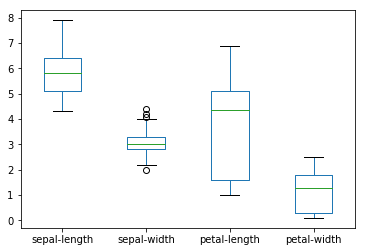

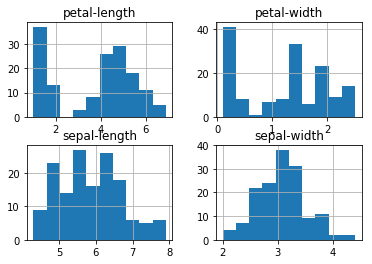

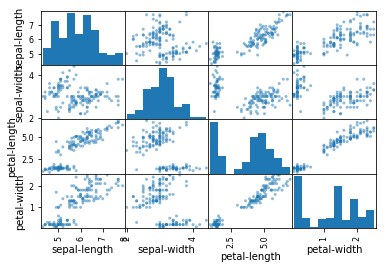

In [0]:
# univariate, histogram and scatter matrix plots
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

dataset.plot(kind='box')
plt.show()
dataset.hist()
plt.show()
scatter_matrix(dataset)
plt.show()

model: LR, mean: 0.9478021978021978, std: 0.04683240074145062


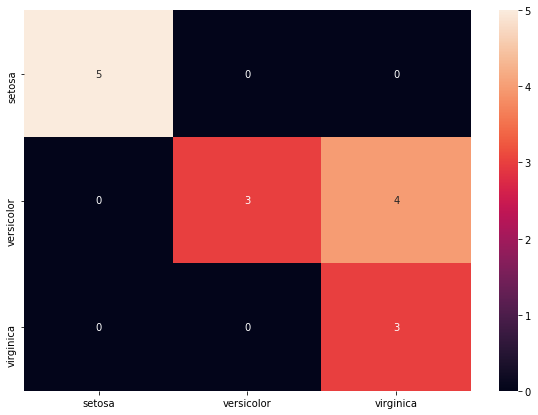


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.43      0.60         7
 Iris-virginica       0.43      1.00      0.60         3

       accuracy                           0.73        15
      macro avg       0.81      0.81      0.73        15
   weighted avg       0.89      0.73      0.73        15


----------------------------------------------------------------------

model: LDA, mean: 0.9774725274725276, std: 0.03444051416310947


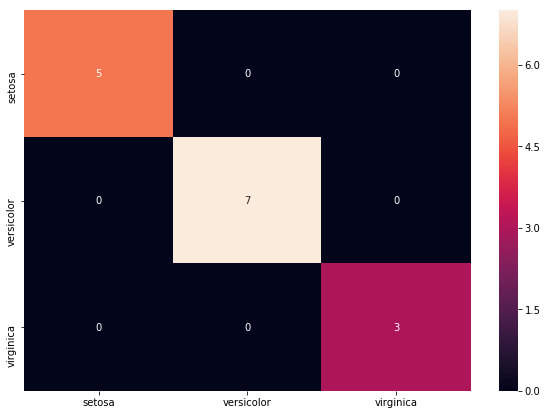


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00         3

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15


----------------------------------------------------------------------

model: KNN, mean: 0.9774725274725276, std: 0.03444051416310947


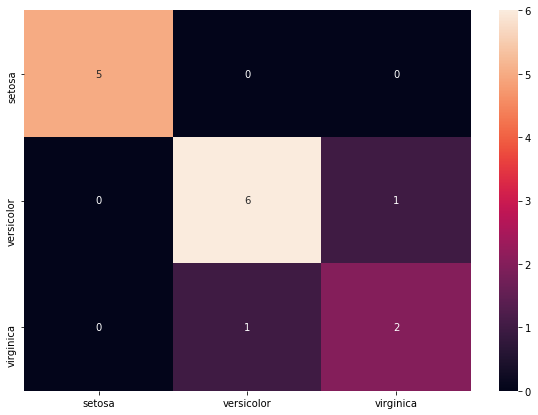


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.86      0.86      0.86         7
 Iris-virginica       0.67      0.67      0.67         3

       accuracy                           0.87        15
      macro avg       0.84      0.84      0.84        15
   weighted avg       0.87      0.87      0.87        15


----------------------------------------------------------------------

model: CART, mean: 0.9472527472527472, std: 0.058314282028226805


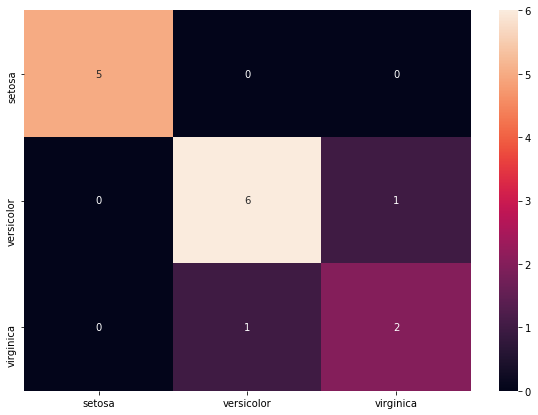


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.86      0.86      0.86         7
 Iris-virginica       0.67      0.67      0.67         3

       accuracy                           0.87        15
      macro avg       0.84      0.84      0.84        15
   weighted avg       0.87      0.87      0.87        15


----------------------------------------------------------------------

model: NB, mean: 0.9483516483516483, std: 0.057898636801404356


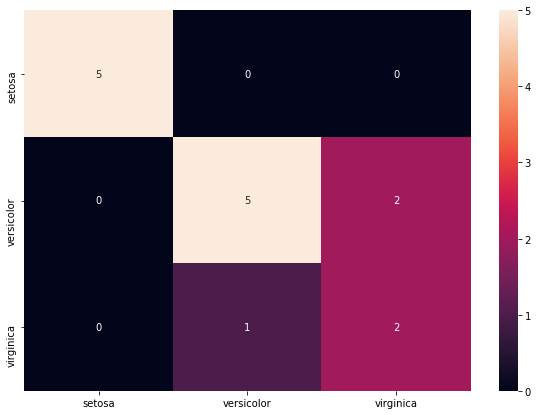


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.83      0.71      0.77         7
 Iris-virginica       0.50      0.67      0.57         3

       accuracy                           0.80        15
      macro avg       0.78      0.79      0.78        15
   weighted avg       0.82      0.80      0.81        15


----------------------------------------------------------------------

model: SVM, mean: 0.9851648351648352, std: 0.029695756300816816


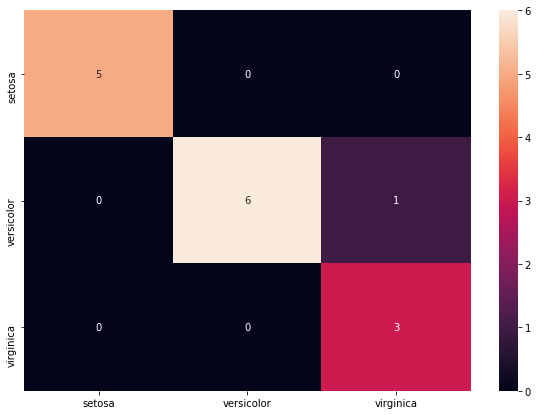


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.75      1.00      0.86         3

       accuracy                           0.93        15
      macro avg       0.92      0.95      0.93        15
   weighted avg       0.95      0.93      0.94        15


----------------------------------------------------------------------



In [0]:
# IMPORT ML LIBRARIES
import seaborn as sn
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# TRAIN AND VALISATION SETS
X = dataset.values[:,0:4] #sepal infos
Y = dataset.values[:,4] #class info
test_size = 0.1
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, 
    Y, 
    test_size=test_size,
    random_state=seed
)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Test options and evaluation metric

scoring = 'accuracy'
results = []
names = []

def printConfusionMatrix(confusionMatrix, classes):
  df_cm = pd.DataFrame(confusionMatrix, index = [cl for cl in classes], columns = [cl for cl in classes])
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True)
  plt.show()

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results);
  names.append(name)
  
 
  model.fit(X_train, Y_train)
  predictions = model.predict(X_validation)
  print("model: {}, mean: {}, std: {}".format(name, cv_results.mean(), cv_results.std()))
  printConfusionMatrix(confusion_matrix(Y_validation, predictions), ["setosa", "versicolor", "virginica"])
  print()
  print(classification_report(Y_validation, predictions))
  print()
  print("----------------------------------------------------------------------")
  print()
  


  

 
